
# Getting started

Once you've chosen your scenario, download the data from the Iowa website in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

## Load the data into a DataFrame
df = pd.read_csv('../../../../../Datasets/Iowa_Liquor_Sales_reduced.csv')

df.head()

## Transform the dates if needed, e.g.
# df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")

/Users/neil/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,$9.99,$14.99,12,$179.88,4.5,1.19
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,$12.50,$18.75,2,$37.50,2.0,0.53
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,$5.97,$8.96,6,$53.76,10.5,2.77
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,$2.24,$3.36,48,$161.28,9.6,2.54
4,03/31/2016,5240,WEST BRANCH,52358,NaN,NaN,1081200.0,CREAM LIQUEURS,305,73055,Rumchata,750,$12.50,$18.75,6,$112.50,4.5,1.19


In [2]:
df.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

## Eradicate Dollar Signs

In [3]:
df['State Bottle Cost'] = df['State Bottle Cost'].str.replace("$", "")
df['State Bottle Retail'] = df['State Bottle Retail'].str.replace("$", "")
df['Sale (Dollars)'] = df['Sale (Dollars)'].str.replace("$", "")
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,9.99,14.99,12,179.88,4.5,1.19
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,12.50,18.75,2,37.50,2.0,0.53
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,5.97,8.96,6,53.76,10.5,2.77
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,2.24,3.36,48,161.28,9.6,2.54
4,03/31/2016,5240,WEST BRANCH,52358,NaN,NaN,1081200.0,CREAM LIQUEURS,305,73055,Rumchata,750,12.50,18.75,6,112.50,4.5,1.19


## Convert Necessary Columns to Floats

In [4]:
df['State Bottle Cost'] = df['State Bottle Cost'].astype('float')
df['State Bottle Retail'] = df['State Bottle Retail'].astype('float')
df['Sale (Dollars)'] = df['Sale (Dollars)'].astype('float')
df.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

## Initial Data Length

In [5]:
len(df)

2709552

## Null Values by Column

In [6]:
df.isnull().sum()

Date                         0
Store Number                 0
City                         0
Zip Code                     0
County Number            10913
County                   10913
Category                   779
Category Name             6109
Vendor Number                0
Item Number                  0
Item Description             0
Bottle Volume (ml)           0
State Bottle Cost            0
State Bottle Retail          0
Bottles Sold                 0
Sale (Dollars)               0
Volume Sold (Liters)         0
Volume Sold (Gallons)        0
dtype: int64

In [7]:
df.dropna(inplace=True)

## New Length of df after Dropping

In [8]:
len(df)

2692602

In [9]:
df['County'].value_counts()

Polk             490417
Linn             231045
Scott            166969
Black Hawk       150480
Johnson          133525
Pottawattamie     91610
Story             90093
Woodbury          85170
Dubuque           76430
Cerro Gordo       64265
Des Moines        40001
Muscatine         39569
Clinton           35106
Wapello           34719
Dickinson         34086
Lee               33574
Webster           30838
Marshall          29758
Jasper            28421
Buena Vista       27428
Dallas            27173
Marion            25803
Warren            24433
Bremer            22070
Poweshiek         21495
Boone             20513
Clay              19269
Jones             18499
Carroll           18453
O'Brien           17330
                  ...  
Wright             6821
Clarke             6756
Greene             6559
Humboldt           6236
Howard             6085
Ida                5932
Adair              5568
Grundy             5503
Pocahontas         5190
Lucas              4987
Mills           

## Created Column 'ml Sold'

In [10]:
df['ml Sold'] = df['Bottle Volume (ml)'] * df['Bottles Sold']
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),ml Sold
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,9.99,14.99,12,179.88,4.50,1.19,4500
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,12.50,18.75,2,37.50,2.00,0.53,2000
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,5.97,8.96,6,53.76,10.50,2.77,10500
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,2.24,3.36,48,161.28,9.60,2.54,9600
5,03/31/2016,4988,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,260,17090,Bulleit Bourbon 10YR,750,23.00,34.50,1,34.50,0.75,0.20,750


## Create a Profit Column ((retail - cost) * bottles sold)

In [11]:
df['Profit'] = (df['State Bottle Retail'] - df['State Bottle Cost']) * df["Bottles Sold"]
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),ml Sold,Profit
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,9.99,14.99,12,179.88,4.50,1.19,4500,60.00
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,12.50,18.75,2,37.50,2.00,0.53,2000,12.50
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,5.97,8.96,6,53.76,10.50,2.77,10500,17.94
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,2.24,3.36,48,161.28,9.60,2.54,9600,53.76
5,03/31/2016,4988,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,260,17090,Bulleit Bourbon 10YR,750,23.00,34.50,1,34.50,0.75,0.20,750,11.50


In [12]:
df.describe()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),ml Sold,Profit
count,2.692602e+06,2.692602e+06,2.692602e+06,2.692602e+06,2.692602e+06,2.692602e+06,2.692602e+06,2.692602e+06,2.692602e+06,2.692602e+06,2.692602e+06,2.692602e+06,2.692602e+06,2.692602e+06
mean,3.586458e+03,5.725644e+01,1.043815e+06,2.563220e+02,4.596171e+04,9.246156e+02,9.803065e+00,1.472047e+01,9.842646e+00,1.290746e+02,8.933294e+00,2.360130e+00,8.933312e+03,4.314914e+01
std,9.479188e+02,2.732611e+01,5.011081e+04,1.408340e+02,5.268866e+04,5.467320e+02,1.493316e+01,2.239944e+01,2.353895e+01,4.000679e+02,2.830157e+01,7.476472e+00,2.830157e+04,1.340737e+02
min,2.106000e+03,1.000000e+00,1.011100e+06,1.000000e+01,1.460000e+02,0.000000e+00,8.900000e-01,1.340000e+00,1.000000e+00,1.340000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.604000e+03,3.100000e+01,1.012200e+06,1.150000e+02,2.682700e+04,7.500000e+02,5.510000e+00,8.270000e+00,2.000000e+00,3.048000e+01,1.500000e+00,4.000000e-01,1.500000e+03,1.017000e+01
50%,3.719000e+03,6.200000e+01,1.031200e+06,2.600000e+02,3.817600e+04,7.500000e+02,8.000000e+00,1.227000e+01,6.000000e+00,7.052000e+01,5.250000e+00,1.390000e+00,5.250000e+03,2.352000e+01
75%,4.378000e+03,7.700000e+01,1.062310e+06,3.800000e+02,6.460100e+04,1.000000e+03,1.192000e+01,1.788000e+01,1.200000e+01,1.350000e+02,1.050000e+01,2.770000e+00,1.050000e+04,4.500000e+01
max,9.023000e+03,9.900000e+01,1.701100e+06,9.780000e+02,9.992750e+05,2.250000e+05,6.468000e+03,9.702000e+03,3.960000e+03,1.063260e+05,3.960000e+03,1.046120e+03,3.960000e+06,3.544200e+04


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

## Reformat the Dates

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

## Sorting df by Date

In [14]:
df.sort_values('Date').head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),ml Sold,Profit
2709551,2015-01-05,2643,WATERLOO,50701,7.0,Black Hawk,1012200.0,SCOTCH WHISKIES,260,5329,Johnnie Walker Blue,750,130.00,195.00,1,195.00,0.75,0.20,750,65.00
2701035,2015-01-05,4019,MANCHESTER,52057,28.0,Delaware,1081200.0,CREAM LIQUEURS,305,73055,Rumchata,750,12.50,18.75,12,225.00,9.00,2.38,9000,75.00
2701034,2015-01-05,4970,WEST LIBERTY,52776,70.0,Muscatine,1031100.0,100 PROOF VODKA,300,36908,Mccormick Vodka Pet,1750,7.47,11.21,6,67.26,10.50,2.77,10500,22.44
2701033,2015-01-05,3679,MONONA,52159,22.0,Clayton,1022100.0,TEQUILA,434,89447,La Prima Tequila/gold,1000,6.59,9.89,1,9.89,1.00,0.26,1000,3.30
2701032,2015-01-05,2648,WEST DES MOINES,50265,77.0,Polk,1062050.0,BARBADOS RUM,205,42437,Shellback Silver,750,8.00,12.00,4,48.00,3.00,0.79,3000,16.00


In [15]:
df.sort_values('Date').tail()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),ml Sold,Profit
4685,2016-03-31,4782,LAMONI,50140,27.0,Decatur,1081305.0,APPLE SCHNAPPS,65,82605,Dekuyper Sour Apple Pucker Traveler,750,6.30,9.45,6,56.70,4.5,1.19,4500,18.90
4686,2016-03-31,5101,WATERLOO,50701,7.0,Black Hawk,1012100.0,CANADIAN WHISKIES,260,10805,Crown Royal Regal Apple,375,7.75,11.63,4,46.52,1.5,0.40,1500,15.52
4687,2016-03-31,4782,LAMONI,50140,27.0,Decatur,1012100.0,CANADIAN WHISKIES,260,10805,Crown Royal Regal Apple,375,7.75,11.63,24,279.12,9.0,2.38,9000,93.12
4689,2016-03-31,5101,WATERLOO,50701,7.0,Black Hawk,1012100.0,CANADIAN WHISKIES,115,10550,Black Velvet Toasted Caramel,750,6.75,10.13,12,121.56,9.0,2.38,9000,40.56
0,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,9.99,14.99,12,179.88,4.5,1.19,4500,60.00


# Record your findings

Be sure to write out any observations from your exploratory analysis.

Multiple columns had a dollar sign which needed to be removed in order to change the column to a float.

The Date column is not proper format so I used to_datetime to change the format

There are missing values for the following columns: County, County Number, Category, Category Name.

The data starts in January of 2015 and ends in March of 2016

# Mine the data

Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations here for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

 


## Sum Columns by County

In [16]:
df_by_county = df.groupby(['County']).sum()
df_by_county.head()

## drop irrelevant columns: store number

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),ml Sold,Profit
County,,,,,,,,,,,,,,
Adair,23070980,5568.0,5.783516e+09,1478326,230621852,5606800,50895.03,76460.59,43482,529851.18,42218.04,11150.70,42218100,177306.64
Adams,5212480,4480.0,2.342090e+09,586404,97600735,2226753,22837.13,34277.08,10173,122431.29,9191.49,2425.93,9192278,40908.67
Allamakee,38617373,32115.0,1.119359e+10,2770763,489352766,11351225,106463.95,159909.81,74514,1002315.42,81060.41,21411.90,81060825,335832.94
Appanoose,35284819,41852.0,1.098021e+10,2715820,470801039,10189875,100276.37,150589.86,81572,1011655.37,75207.15,19867.97,75207175,338367.62
Audubon,10683487,12265.0,2.563406e+09,605063,104201130,2507925,21180.64,31832.57,18552,210962.80,18283.05,4830.81,18283000,70731.86


## Number of Stores in each County

In [17]:
df_by_county['# of Stores'] = df.groupby(['County'])['Store Number'].nunique()

#### concat a column of number of stores in a county by using store number unique

#### groupby county -- store number unique.sum()

## Profit Per Store

In [18]:
df_by_county['Profit Per Store'] = df_by_county['Profit'] / df_by_county['# of Stores']
df_by_county.head()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),ml Sold,Profit,# of Stores,Profit Per Store
County,,,,,,,,,,,,,,,,
Adair,23070980,5568.0,5.783516e+09,1478326,230621852,5606800,50895.03,76460.59,43482,529851.18,42218.04,11150.70,42218100,177306.64,8,22163.330000
Adams,5212480,4480.0,2.342090e+09,586404,97600735,2226753,22837.13,34277.08,10173,122431.29,9191.49,2425.93,9192278,40908.67,1,40908.670000
Allamakee,38617373,32115.0,1.119359e+10,2770763,489352766,11351225,106463.95,159909.81,74514,1002315.42,81060.41,21411.90,81060825,335832.94,6,55972.156667
Appanoose,35284819,41852.0,1.098021e+10,2715820,470801039,10189875,100276.37,150589.86,81572,1011655.37,75207.15,19867.97,75207175,338367.62,6,56394.603333
Audubon,10683487,12265.0,2.563406e+09,605063,104201130,2507925,21180.64,31832.57,18552,210962.80,18283.05,4830.81,18283000,70731.86,3,23577.286667


# Refine the data

Look for any statistical relationships, correlations, or other relevant properties of the dataset.

## Read in Population Estimates

In [19]:
pop_est = pd.read_excel('pop_est.xls', header=None)
##reassign column header
## drop rows
pop_est.drop([0,1,2,3,4,5,6,7,8,9], inplace=True)
pop_est.head(15)

,0,1,2,3,4,5,6,7,8,9
10,Adair,8208.0,7721.0,7538.0,7628.0,7732.0,7843.0,7957.0,8073.0,8191.0
11,Adams,4475.0,4161.0,4019.0,3973.0,3934.0,3899.0,3865.0,3832.0,3799.0
12,Allamakee,14668.0,14474.0,14593.0,14747.0,14927.0,15121.0,15319.0,15519.0,15723.0
13,Appanoose,13700.0,13327.0,12793.0,12668.0,12567.0,12478.0,12393.0,12310.0,12231.0
14,Audubon,6807.0,6248.0,6013.0,5971.0,5940.0,5915.0,5891.0,5869.0,5849.0
15,Benton,25338.0,26647.0,26715.0,27205.0,27744.0,28308.0,28881.0,29460.0,30048.0
16,Black Hawk,127997.0,126549.0,128968.0,130684.0,132638.0,134717.0,136837.0,138984.0,141175.0
17,Boone,26255.0,26334.0,26364.0,26436.0,26557.0,26704.0,26859.0,27020.0,27188.0
18,Bremer,23282.0,23420.0,23830.0,24209.0,24633.0,25080.0,25534.0,25994.0,26462.0
19,Buchanan,21078.0,20757.0,21091.0,21267.0,21481.0,21716.0,21957.0,22202.0,22454.0


In [20]:
pop_est.drop([1,2,3,7,8,9], axis=1, inplace=True)

In [21]:
pop_est.drop([109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124], inplace=True)

In [22]:
print pop_est.head()
print pop_est.tail()

            0        4        5        6
10      Adair   7628.0   7732.0   7843.0
11      Adams   3973.0   3934.0   3899.0
12  Allamakee  14747.0  14927.0  15121.0
13  Appanoose  12668.0  12567.0  12478.0
14    Audubon   5971.0   5940.0   5915.0
              0         4         5         6
104   Winnebago   10834.0   10810.0   10796.0
105  Winneshiek   21215.0   21477.0   21759.0
106    Woodbury  103311.0  104078.0  104941.0
107       Worth    7601.0    7575.0    7557.0
108      Wright   12560.0   12346.0   12142.0


In [23]:
names= ['County', '2015 Population','2020 Population','2025 Population']
pop_est.columns = names
print pop_est.head()

       County  2015 Population  2020 Population  2025 Population
10      Adair           7628.0           7732.0           7843.0
11      Adams           3973.0           3934.0           3899.0
12  Allamakee          14747.0          14927.0          15121.0
13  Appanoose          12668.0          12567.0          12478.0
14    Audubon           5971.0           5940.0           5915.0


In [24]:
len(pop_est)

99

In [25]:
len(df_by_county)

99

In [26]:
pop_est.reset_index(inplace=True)

In [27]:
pop_est.drop('index', axis=1, inplace=True)
pop_est.head()

,County,2015 Population,2020 Population,2025 Population
0,Adair,7628.0,7732.0,7843.0
1,Adams,3973.0,3934.0,3899.0
2,Allamakee,14747.0,14927.0,15121.0
3,Appanoose,12668.0,12567.0,12478.0
4,Audubon,5971.0,5940.0,5915.0


In [28]:
pop_est.set_index('County', inplace=True)
pop_est.head()

,2015 Population,2020 Population,2025 Population
County,,,
Adair,7628.0,7732.0,7843.0
Adams,3973.0,3934.0,3899.0
Allamakee,14747.0,14927.0,15121.0
Appanoose,12668.0,12567.0,12478.0
Audubon,5971.0,5940.0,5915.0


## Population per Store based on Current Population

In [29]:
df_by_county['Pop Store Ratio Current'] = pop_est['2015 Population'] / df_by_county['# of Stores']
df_by_county.head()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),ml Sold,Profit,# of Stores,Profit Per Store,Pop Store Ratio Current
County,,,,,,,,,,,,,,,,,
Adair,23070980,5568.0,5.783516e+09,1478326,230621852,5606800,50895.03,76460.59,43482,529851.18,42218.04,11150.70,42218100,177306.64,8,22163.330000,953.500000
Adams,5212480,4480.0,2.342090e+09,586404,97600735,2226753,22837.13,34277.08,10173,122431.29,9191.49,2425.93,9192278,40908.67,1,40908.670000,3973.000000
Allamakee,38617373,32115.0,1.119359e+10,2770763,489352766,11351225,106463.95,159909.81,74514,1002315.42,81060.41,21411.90,81060825,335832.94,6,55972.156667,2457.833333
Appanoose,35284819,41852.0,1.098021e+10,2715820,470801039,10189875,100276.37,150589.86,81572,1011655.37,75207.15,19867.97,75207175,338367.62,6,56394.603333,2111.333333
Audubon,10683487,12265.0,2.563406e+09,605063,104201130,2507925,21180.64,31832.57,18552,210962.80,18283.05,4830.81,18283000,70731.86,3,23577.286667,1990.333333


## Population per Store based on 2020 Pop Estimate

In [30]:
df_by_county['Pop Store Ratio 2020'] = pop_est['2020 Population'] / df_by_county['# of Stores']
df_by_county.head()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),ml Sold,Profit,# of Stores,Profit Per Store,Pop Store Ratio Current,Pop Store Ratio 2020
County,,,,,,,,,,,,,,,,,,
Adair,23070980,5568.0,5.783516e+09,1478326,230621852,5606800,50895.03,76460.59,43482,529851.18,42218.04,11150.70,42218100,177306.64,8,22163.330000,953.500000,966.500000
Adams,5212480,4480.0,2.342090e+09,586404,97600735,2226753,22837.13,34277.08,10173,122431.29,9191.49,2425.93,9192278,40908.67,1,40908.670000,3973.000000,3934.000000
Allamakee,38617373,32115.0,1.119359e+10,2770763,489352766,11351225,106463.95,159909.81,74514,1002315.42,81060.41,21411.90,81060825,335832.94,6,55972.156667,2457.833333,2487.833333
Appanoose,35284819,41852.0,1.098021e+10,2715820,470801039,10189875,100276.37,150589.86,81572,1011655.37,75207.15,19867.97,75207175,338367.62,6,56394.603333,2111.333333,2094.500000
Audubon,10683487,12265.0,2.563406e+09,605063,104201130,2507925,21180.64,31832.57,18552,210962.80,18283.05,4830.81,18283000,70731.86,3,23577.286667,1990.333333,1980.000000


In [31]:
combined_df = pd.concat([df_by_county, pop_est], axis=1)
combined_df.head()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),...,Volume Sold (Gallons),ml Sold,Profit,# of Stores,Profit Per Store,Pop Store Ratio Current,Pop Store Ratio 2020,2015 Population,2020 Population,2025 Population
County,,,,,,,,,,,,,,,,,,,,,
Adair,23070980,5568.0,5.783516e+09,1478326,230621852,5606800,50895.03,76460.59,43482,529851.18,...,11150.70,42218100,177306.64,8,22163.330000,953.500000,966.500000,7628.0,7732.0,7843.0
Adams,5212480,4480.0,2.342090e+09,586404,97600735,2226753,22837.13,34277.08,10173,122431.29,...,2425.93,9192278,40908.67,1,40908.670000,3973.000000,3934.000000,3973.0,3934.0,3899.0
Allamakee,38617373,32115.0,1.119359e+10,2770763,489352766,11351225,106463.95,159909.81,74514,1002315.42,...,21411.90,81060825,335832.94,6,55972.156667,2457.833333,2487.833333,14747.0,14927.0,15121.0
Appanoose,35284819,41852.0,1.098021e+10,2715820,470801039,10189875,100276.37,150589.86,81572,1011655.37,...,19867.97,75207175,338367.62,6,56394.603333,2111.333333,2094.500000,12668.0,12567.0,12478.0
Audubon,10683487,12265.0,2.563406e+09,605063,104201130,2507925,21180.64,31832.57,18552,210962.80,...,4830.81,18283000,70731.86,3,23577.286667,1990.333333,1980.000000,5971.0,5940.0,5915.0


## Saturation Level - Population to Store Ratio

In [32]:
combined_df['Pop Store Ratio Current'].sort_values(ascending=False)

County
Davis            8603.000000
Fremont          7449.000000
Jones            5105.250000
Lucas            4604.500000
Benton           4534.166667
Winneshiek       4243.000000
Henry            4035.400000
Dallas           3991.823529
Adams            3973.000000
Jefferson        3906.750000
Mahaska          3727.833333
Sioux            3683.777778
Tama             3510.000000
Keokuk           3467.333333
Delaware         3433.600000
Howard           3252.333333
Osceola          3172.000000
Washington       3110.714286
Plymouth         3084.875000
Marion           3072.090909
Wayne            3042.000000
Shelby           2960.250000
Hancock          2864.500000
Clinton          2859.529412
Johnson          2748.018868
Woodbury         2718.710526
Warren           2716.722222
Crawford         2713.666667
Bremer           2689.888889
Mills            2654.833333
                    ...     
Hamilton         1887.125000
Webster          1885.950000
Fayette          1812.545455
Black H

## Sorted by Profit per Store Grouped by County

In [33]:
combined_df['Profit Per Store'].sort_values(ascending=False)

County
Johnson          135435.399811
Dallas           129628.585294
Polk             126074.923478
Scott            124271.854478
Cerro Gordo      117558.444500
Woodbury         108277.022895
Winneshiek       105471.412000
Dickinson        102976.731333
Linn             101831.618020
Jones            101421.407500
Kossuth          100449.710000
Story             92901.796316
Lee               91867.514118
Black Hawk        90664.060274
Howard            90361.583333
Jefferson         89285.365000
Dubuque           88884.881750
Henry             88746.710000
Lucas             86414.000000
Crawford          86258.336667
Washington        86236.202857
Marshall          84120.691333
Clinton           81512.827647
Bremer            80642.751111
Carroll           79956.293333
Shelby            79930.570000
Wapello           79906.327857
Clay              79656.482500
Plymouth          79185.133750
Pottawattamie     78077.565472
                     ...      
Madison           39217.116250
D

## Consumption per Person

In [34]:
combined_df['Consumption Per Person'] = combined_df['ml Sold'] / combined_df["2015 Population"]

In [35]:
combined_df.head()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),...,ml Sold,Profit,# of Stores,Profit Per Store,Pop Store Ratio Current,Pop Store Ratio 2020,2015 Population,2020 Population,2025 Population,Consumption Per Person
County,,,,,,,,,,,,,,,,,,,,,
Adair,23070980,5568.0,5.783516e+09,1478326,230621852,5606800,50895.03,76460.59,43482,529851.18,...,42218100,177306.64,8,22163.330000,953.500000,966.500000,7628.0,7732.0,7843.0,5534.622444
Adams,5212480,4480.0,2.342090e+09,586404,97600735,2226753,22837.13,34277.08,10173,122431.29,...,9192278,40908.67,1,40908.670000,3973.000000,3934.000000,3973.0,3934.0,3899.0,2313.686886
Allamakee,38617373,32115.0,1.119359e+10,2770763,489352766,11351225,106463.95,159909.81,74514,1002315.42,...,81060825,335832.94,6,55972.156667,2457.833333,2487.833333,14747.0,14927.0,15121.0,5496.767139
Appanoose,35284819,41852.0,1.098021e+10,2715820,470801039,10189875,100276.37,150589.86,81572,1011655.37,...,75207175,338367.62,6,56394.603333,2111.333333,2094.500000,12668.0,12567.0,12478.0,5936.783628
Audubon,10683487,12265.0,2.563406e+09,605063,104201130,2507925,21180.64,31832.57,18552,210962.80,...,18283000,70731.86,3,23577.286667,1990.333333,1980.000000,5971.0,5940.0,5915.0,3061.966170


# Housing Data

In [36]:
fields = ['County Name', 'Residential', 'Commercial']
housing = pd.read_csv('../../../../../Datasets/Assessed_Property_Values_By_Tax_District_and_Year.csv', usecols=fields)
housing.head()

,County Name,Residential,Commercial
0,ADAIR,$5314109.00,$58629.00
1,ADAIR,$5734665.00,$129671.00
2,ADAIR,$811808.00,$0.00
3,ADAIR,$318152.00,$0.00
4,ADAIR,$144334.00,$0.00


In [37]:
housing['Residential'] = housing.Residential.str.replace("$","").astype(float)
housing['Commercial'] = housing.Commercial.str.replace("$","").astype(float)

In [38]:
housing['County Name'] = housing['County Name'].str.title()

In [39]:
housing = housing.groupby('County Name').mean()

In [40]:
housing.head()

,Residential,Commercial
County Name,,
Adair,2.929311e+06,741214.722222
Adams,2.687642e+06,320516.351351
Allamakee,5.205293e+06,615578.510309
Appanoose,5.115733e+06,945715.355556
Audubon,2.784064e+06,466374.754902


In [41]:
combined_df['Residential Value'] = housing.Residential
combined_df['Commercial Value'] = housing.Commercial

In [42]:
print(housing.Residential / 10000).sort_values(ascending=False)

County Name
Polk             3861.985547
Johnson          2735.466733
Black Hawk       2673.191714
Scott            2395.859780
Linn             2272.263054
Dickinson        2056.349401
Wapello          1662.124396
Pottawattamie    1635.435704
Woodbury         1570.471321
Story            1568.784170
Clinton          1521.700861
Dubuque          1344.553555
Muscatine        1326.014922
Bremer           1276.305091
Jefferson        1275.589800
Marshall         1227.559093
Warren           1226.239901
Marion           1225.109242
Cerro Gordo      1212.907850
Mills            1211.206856
Lee              1203.863894
Winneshiek       1182.155926
Dallas           1130.992841
Des Moines        992.410737
Mahaska           990.875971
Boone             985.681014
Washington        879.453543
Plymouth          835.329462
Buena Vista       804.432543
Union             714.560532
                    ...     
Keokuk            412.834560
Clarke            410.253968
Kossuth           409.187939
Mi

In [43]:
combined_df.head()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),...,# of Stores,Profit Per Store,Pop Store Ratio Current,Pop Store Ratio 2020,2015 Population,2020 Population,2025 Population,Consumption Per Person,Residential Value,Commercial Value
County,,,,,,,,,,,,,,,,,,,,,
Adair,23070980,5568.0,5.783516e+09,1478326,230621852,5606800,50895.03,76460.59,43482,529851.18,...,8,22163.330000,953.500000,966.500000,7628.0,7732.0,7843.0,5534.622444,2.929311e+06,741214.722222
Adams,5212480,4480.0,2.342090e+09,586404,97600735,2226753,22837.13,34277.08,10173,122431.29,...,1,40908.670000,3973.000000,3934.000000,3973.0,3934.0,3899.0,2313.686886,2.687642e+06,320516.351351
Allamakee,38617373,32115.0,1.119359e+10,2770763,489352766,11351225,106463.95,159909.81,74514,1002315.42,...,6,55972.156667,2457.833333,2487.833333,14747.0,14927.0,15121.0,5496.767139,5.205293e+06,615578.510309
Appanoose,35284819,41852.0,1.098021e+10,2715820,470801039,10189875,100276.37,150589.86,81572,1011655.37,...,6,56394.603333,2111.333333,2094.500000,12668.0,12567.0,12478.0,5936.783628,5.115733e+06,945715.355556
Audubon,10683487,12265.0,2.563406e+09,605063,104201130,2507925,21180.64,31832.57,18552,210962.80,...,3,23577.286667,1990.333333,1980.000000,5971.0,5940.0,5915.0,3061.966170,2.784064e+06,466374.754902


## Unemployment Data

In [44]:
fields = ['Year', 'County Name', 'Benefits Paid', 'Weeks Compensated']
unemployment = pd.read_csv('../../../../../Datasets/Unemployment_Insurance_Recipients_and_UI_Benefit_Payments_by_County__Annual_.csv', usecols=fields)
unemployment.head()

,Year,County Name,Benefits Paid,Weeks Compensated
0,2000,Adair,$566423,2464
1,2000,Adams,$569843,2421
2,2000,Allamakee,$1353614,6348
3,2000,Appanoose,$1535045,6931
4,2000,Audubon,$553191,2437


In [45]:
unemployment.reset_index(inplace=True)

In [46]:
unemployment.drop('index', axis=1, inplace=True)

In [47]:
unemployment = unemployment[unemployment.Year == 2015]
unemployment.head()

,Year,County Name,Benefits Paid,Weeks Compensated
1485,2015,Adair,$776735,2202
1486,2015,Adams,$289699,810
1487,2015,Allamakee,$1636769,4703
1488,2015,Appanoose,$1609485,5004
1489,2015,Audubon,$718147,2128


In [48]:
unemployment.set_index('County Name', inplace=True)

In [49]:
combined_df["Weeks Rec Unemployment Benefits"] = (unemployment['Weeks Compensated']) / (combined_df['2015 Population'])

In [50]:
combined_df.head()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),...,Profit Per Store,Pop Store Ratio Current,Pop Store Ratio 2020,2015 Population,2020 Population,2025 Population,Consumption Per Person,Residential Value,Commercial Value,Weeks Rec Unemployment Benefits
County,,,,,,,,,,,,,,,,,,,,,
Adair,23070980,5568.0,5.783516e+09,1478326,230621852,5606800,50895.03,76460.59,43482,529851.18,...,22163.330000,953.500000,966.500000,7628.0,7732.0,7843.0,5534.622444,2.929311e+06,741214.722222,0.288673
Adams,5212480,4480.0,2.342090e+09,586404,97600735,2226753,22837.13,34277.08,10173,122431.29,...,40908.670000,3973.000000,3934.000000,3973.0,3934.0,3899.0,2313.686886,2.687642e+06,320516.351351,0.203876
Allamakee,38617373,32115.0,1.119359e+10,2770763,489352766,11351225,106463.95,159909.81,74514,1002315.42,...,55972.156667,2457.833333,2487.833333,14747.0,14927.0,15121.0,5496.767139,5.205293e+06,615578.510309,0.318912
Appanoose,35284819,41852.0,1.098021e+10,2715820,470801039,10189875,100276.37,150589.86,81572,1011655.37,...,56394.603333,2111.333333,2094.500000,12668.0,12567.0,12478.0,5936.783628,5.115733e+06,945715.355556,0.395011
Audubon,10683487,12265.0,2.563406e+09,605063,104201130,2507925,21180.64,31832.57,18552,210962.80,...,23577.286667,1990.333333,1980.000000,5971.0,5940.0,5915.0,3061.966170,2.784064e+06,466374.754902,0.356389


In [51]:
combined_df.isnull()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),...,Profit Per Store,Pop Store Ratio Current,Pop Store Ratio 2020,2015 Population,2020 Population,2025 Population,Consumption Per Person,Residential Value,Commercial Value,Weeks Rec Unemployment Benefits
County,,,,,,,,,,,,,,,,,,,,,
Adair,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Adams,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Allamakee,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Appanoose,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Audubon,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Benton,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Black Hawk,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Boone,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Bremer,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
combined_df.fillna(value=0, inplace=True)

## Outlier Adjusted DataFrame

In [53]:
outlier_adjusted = combined_df.drop(['Davis','Fremont'], axis=0)

## Correlation Between Independent Variables

In [54]:
import seaborn as sns

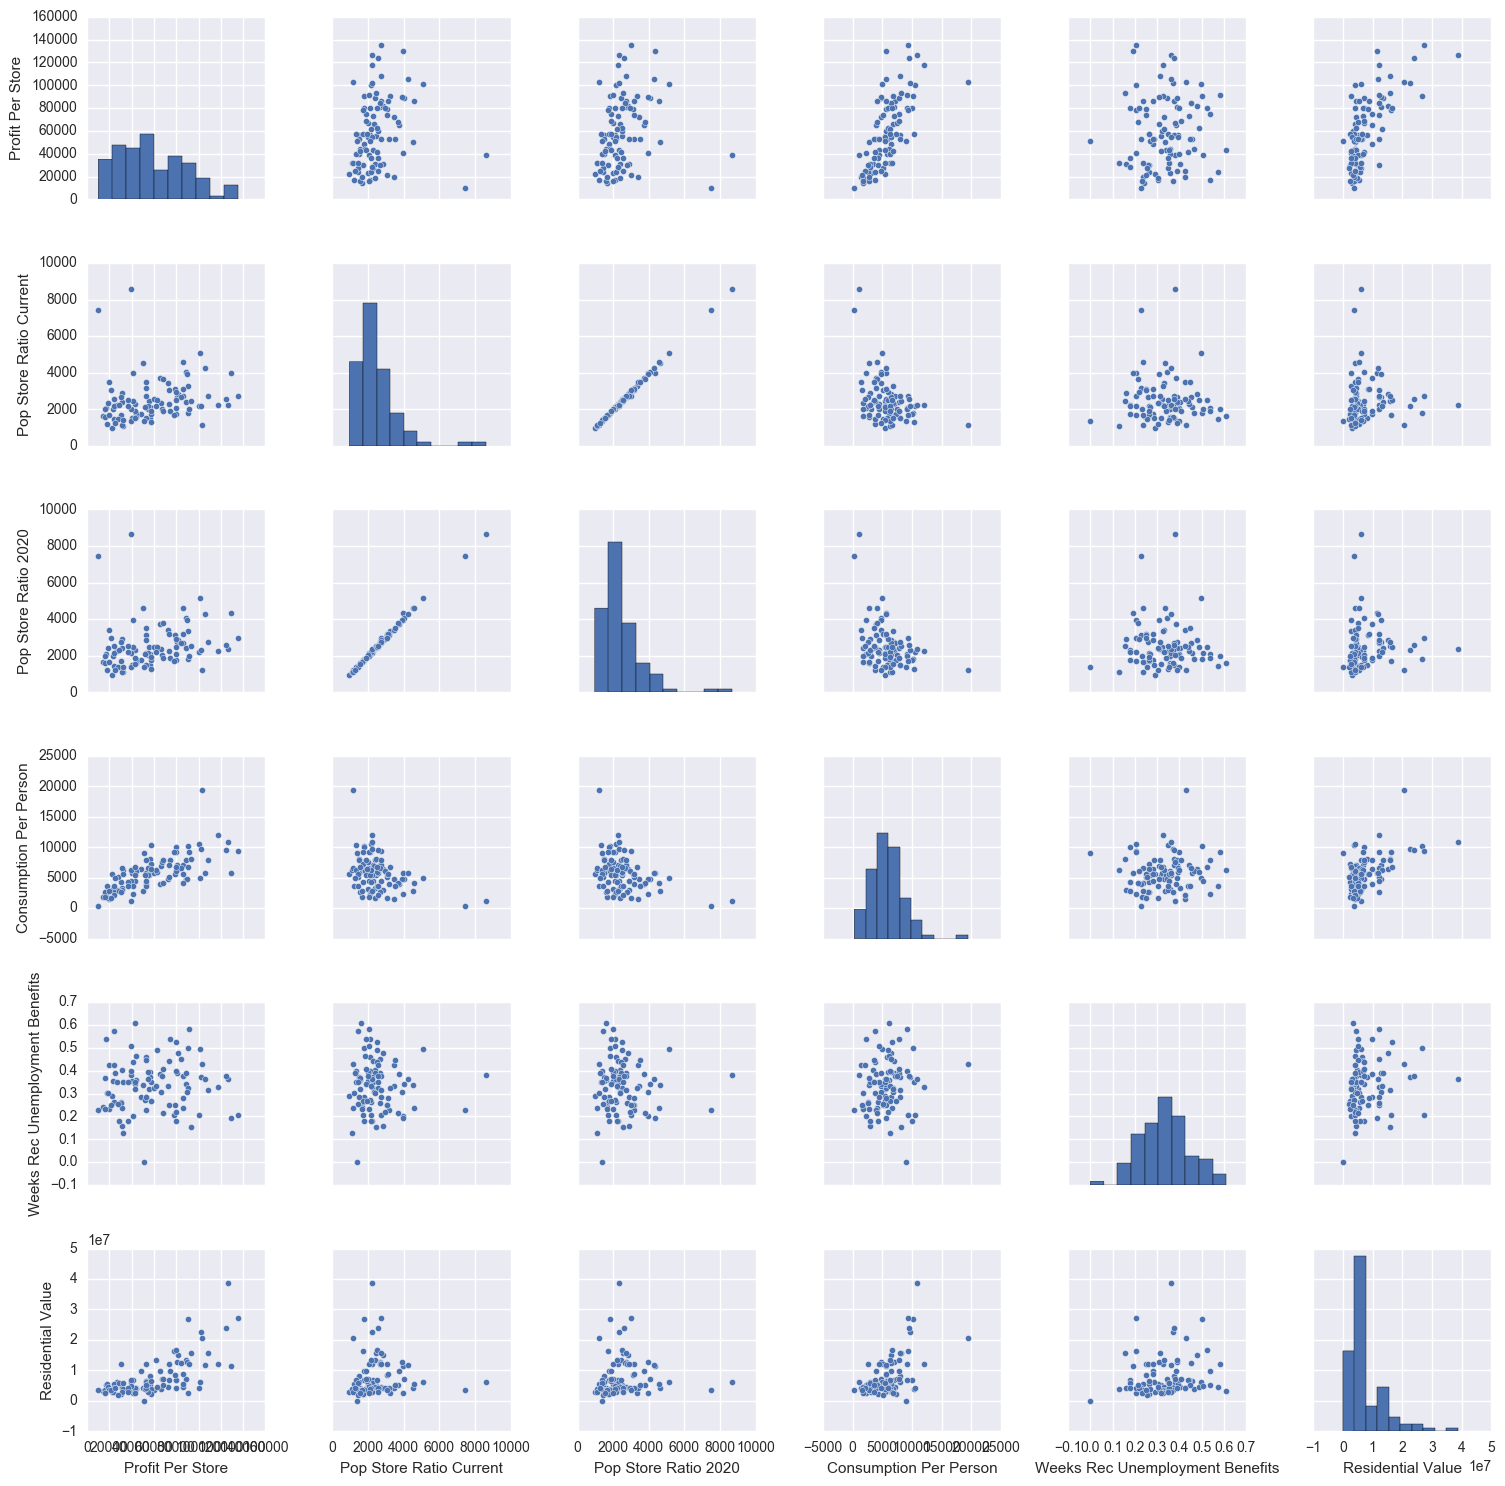

In [55]:
sns.pairplot(combined_df[['Profit Per Store','Pop Store Ratio Current','Pop Store Ratio 2020','Consumption Per Person','Weeks Rec Unemployment Benefits','Residential Value']])

In [56]:
combined_df.corr()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),...,Profit Per Store,Pop Store Ratio Current,Pop Store Ratio 2020,2015 Population,2020 Population,2025 Population,Consumption Per Person,Residential Value,Commercial Value,Weeks Rec Unemployment Benefits
Store Number,1.000000,0.955397,0.999627,0.999605,0.999235,0.999101,0.998860,0.998860,0.996921,0.994615,...,0.515318,-0.070323,-0.051047,0.990685,0.989997,0.989029,0.441591,0.828583,0.906785,0.061200
County Number,0.955397,1.000000,0.955121,0.955494,0.956333,0.955506,0.959053,0.959046,0.957732,0.963042,...,0.458859,-0.039817,-0.022882,0.954615,0.955013,0.955039,0.355155,0.742332,0.838805,0.000091
Category,0.999627,0.955121,1.000000,0.999978,0.999623,0.999686,0.999421,0.999421,0.996637,0.994807,...,0.523698,-0.067876,-0.048474,0.991151,0.990593,0.989742,0.447266,0.831444,0.908979,0.061335
Vendor Number,0.999605,0.955494,0.999978,1.000000,0.999664,0.999645,0.999448,0.999448,0.996665,0.994877,...,0.523306,-0.067661,-0.048244,0.991122,0.990614,0.989809,0.446798,0.830876,0.908286,0.061403
Item Number,0.999235,0.956333,0.999623,0.999664,1.000000,0.999253,0.999685,0.999684,0.997312,0.996223,...,0.518327,-0.063613,-0.044202,0.990671,0.990517,0.990032,0.438275,0.827322,0.906818,0.057797
Bottle Volume (ml),0.999101,0.955506,0.999686,0.999645,0.999253,1.000000,0.999542,0.999542,0.995683,0.994581,...,0.530657,-0.070897,-0.051240,0.990894,0.990409,0.989625,0.457211,0.831884,0.908892,0.059577
State Bottle Cost,0.998860,0.959053,0.999421,0.999448,0.999685,0.999542,1.000000,1.000000,0.996892,0.996558,...,0.521858,-0.066180,-0.046655,0.990648,0.990552,0.990120,0.444787,0.826560,0.906488,0.054607
State Bottle Retail,0.998860,0.959046,0.999421,0.999448,0.999684,0.999542,1.000000,1.000000,0.996890,0.996556,...,0.521864,-0.066185,-0.046659,0.990648,0.990552,0.990120,0.444798,0.826561,0.906486,0.054607
Bottles Sold,0.996921,0.957732,0.996637,0.996665,0.997312,0.995683,0.996892,0.996890,1.000000,0.998615,...,0.511431,-0.055561,-0.036440,0.990140,0.989933,0.989401,0.425068,0.820740,0.906437,0.058143
Sale (Dollars),0.994615,0.963042,0.994807,0.994877,0.996223,0.994581,0.996558,0.996556,0.998615,1.000000,...,0.515125,-0.050939,-0.031087,0.990354,0.990874,0.990999,0.422894,0.815322,0.904449,0.045146


In [57]:
combined_df.dtypes

Store Number                         int64
County Number                      float64
Category                           float64
Vendor Number                        int64
Item Number                          int64
Bottle Volume (ml)                   int64
State Bottle Cost                  float64
State Bottle Retail                float64
Bottles Sold                         int64
Sale (Dollars)                     float64
Volume Sold (Liters)               float64
Volume Sold (Gallons)              float64
ml Sold                              int64
Profit                             float64
# of Stores                          int64
Profit Per Store                   float64
Pop Store Ratio Current            float64
Pop Store Ratio 2020               float64
2015 Population                    float64
2020 Population                    float64
2025 Population                    float64
Consumption Per Person             float64
Residential Value                  float64
Commercial 

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.cross_validation import cross_val_score
from sklearn import linear_model

## Model with all Values

In [59]:
X = combined_df[['Pop Store Ratio Current','Consumption Per Person', 'Residential Value']]
X_future = combined_df[['Pop Store Ratio 2020','Consumption Per Person', 'Residential Value']]
y = combined_df['Profit Per Store']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=99)

reg = LinearRegression()
model = reg.fit(X_train,y_train)
#cross_val_score(model, X_train, y_train, cv=3).mean()

## Train Score All Values

In [60]:
model.score(X_train,y_train)

0.74700478030355599

## Test Score All Values

In [61]:
model.score(X_test,y_test)

0.76200442155691506

## Profit Per Store Predictions by County

In [62]:
y_pred_2015 = model.predict(X)

In [63]:
y_pred_2020 = model.predict(X_future)

In [64]:
combined_df['y_pred_2015'] = y_pred_2015
combined_df['y_pred_2020'] = y_pred_2020

In [65]:
combined_df.head()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),...,Pop Store Ratio 2020,2015 Population,2020 Population,2025 Population,Consumption Per Person,Residential Value,Commercial Value,Weeks Rec Unemployment Benefits,y_pred_2015,y_pred_2020
County,,,,,,,,,,,,,,,,,,,,,
Adair,23070980,5568.0,5.783516e+09,1478326,230621852,5606800,50895.03,76460.59,43482,529851.18,...,966.500000,7628.0,7732.0,7843.0,5534.622444,2.929311e+06,741214.722222,0.288673,30293.598411,30471.761390
Adams,5212480,4480.0,2.342090e+09,586404,97600735,2226753,22837.13,34277.08,10173,122431.29,...,3934.000000,3973.0,3934.0,3899.0,2313.686886,2.687642e+06,320516.351351,0.203876,47253.590133,46719.101199
Allamakee,38617373,32115.0,1.119359e+10,2770763,489352766,11351225,106463.95,159909.81,74514,1002315.42,...,2487.833333,14747.0,14927.0,15121.0,5496.767139,5.205293e+06,615578.510309,0.318912,53720.643411,54131.788745
Appanoose,35284819,41852.0,1.098021e+10,2715820,470801039,10189875,100276.37,150589.86,81572,1011655.37,...,2094.500000,12668.0,12567.0,12478.0,5936.783628,5.115733e+06,945715.355556,0.395011,52141.603170,51910.904954
Audubon,10683487,12265.0,2.563406e+09,605063,104201130,2507925,21180.64,31832.57,18552,210962.80,...,1980.000000,5971.0,5940.0,5915.0,3061.966170,2.784064e+06,466374.754902,0.356389,25809.803491,25668.186765


## Model Removing Outliers

In [66]:
X = outlier_adjusted[['Pop Store Ratio Current','Consumption Per Person', 'Residential Value']]
X_future = outlier_adjusted[['Pop Store Ratio 2020','Consumption Per Person', 'Residential Value']]
y = outlier_adjusted['Profit Per Store']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=99)

reg = LinearRegression()
model = reg.fit(X_train,y_train)
#cross_val_score(model, X_train, y_train, cv=3).mean()

## Train Score Outliers Removed

In [67]:
model.score(X_train,y_train)

0.87157281849066792

## Test Score Outliers Removed

In [68]:
model.score(X_test,y_test)

0.93877213569048656

# Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

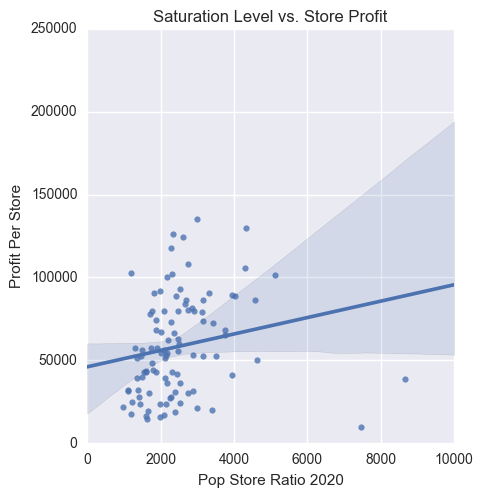

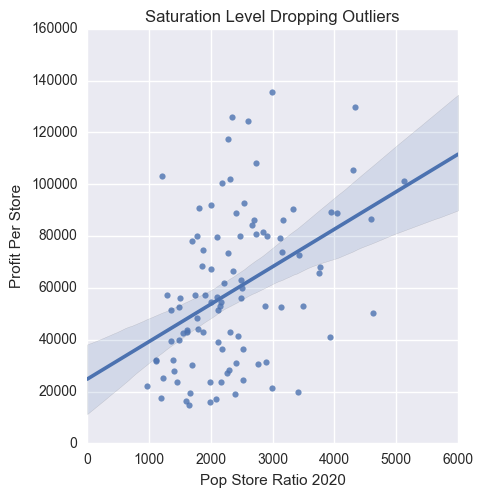

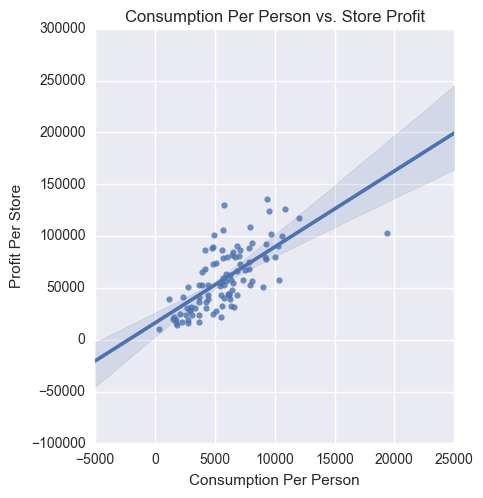

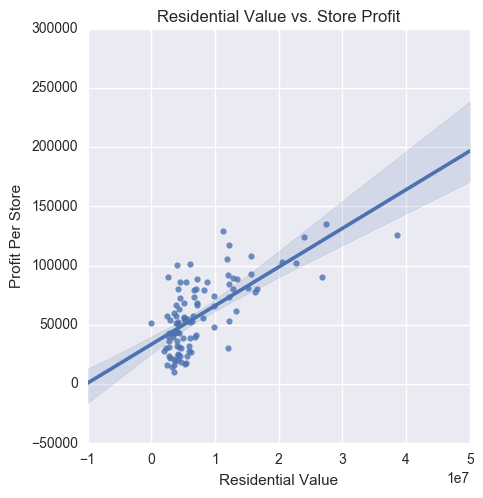

In [73]:
sns.lmplot("Pop Store Ratio 2020", "Profit Per Store", data=combined_df)
plt.title('Saturation Level vs. Store Profit')
sns.lmplot("Pop Store Ratio 2020", "Profit Per Store", data=outlier_adjusted)
plt.title('Saturation Level Dropping Outliers')

sns.lmplot("Consumption Per Person", "Profit Per Store", data=combined_df)
plt.title('Consumption Per Person vs. Store Profit')
sns.lmplot("Residential Value", "Profit Per Store", data=combined_df)
plt.title('Residential Value vs. Store Profit')

In [72]:
combined_df['y_pred_2015'].sort_values(ascending=False).head(10)

County
Dickinson      160785.781359
Polk           136183.042352
Johnson        116469.108745
Scott          110361.473195
Black Hawk     109318.423401
Cerro Gordo    109249.951798
Davis          106515.374612
Linn           105265.146080
Woodbury        89895.847471
Winneshiek      88595.711345
Name: y_pred_2015, dtype: float64

In [71]:
combined_df['y_pred_2020'].sort_values().head(10)

County
Decatur      12512.869647
Taylor       15661.247786
Grundy       18996.974359
Ringgold     20276.097170
Calhoun      23325.541044
Louisa       23737.222747
Butler       24361.435123
Clayton      25543.469140
Audubon      25668.186765
Van Buren    27996.641816
Name: y_pred_2020, dtype: float64

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

In [ ]:
#combined_df.to_csv('Combined_df_new.csv')

In [ ]:
#outlier_adjusted.to_csv('outlier_adjusted.csv')